## Bagging (Random Forest)

In [1]:
# Importar las librerías necesarias 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 


### Cargar el conjunto de datos
https://archive.ics.uci.edu/dataset/267/banknote+authentication

In [2]:
# Abrir con una url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
# Asignar nuestra cabecera o nombres de las características
columnas = ["variance", "skewness", "curtosis", "entropy", "class"]
# Cargar nuestro dataframe
df = pd.read_csv(url, names=columnas)

df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [3]:
# Matriz X de entrada
X = df.drop("class", axis=1)
# Vector y de salida
y = df["class"]

# Dividir en conjunto de entrenamiento y validación 80-20 / 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

### Importar nuestro modelo Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, random_state=42)

### Entrenar el modelo

In [5]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

### Validar el modelo

In [6]:
y_pred = rf.predict(X_test) #Variables predichas por el modelo

exactitud = accuracy_score(y_test, y_pred)

print(f"El modelo de Random Forest obtuvo una exactitud de: {exactitud}")



El modelo de Random Forest obtuvo una exactitud de: 0.9975728155339806


### Matriz de confusión

Tarea: Clasificar hongos comestibles
Clases: Si y No

1 -> Si(Predicción)     Verdad Terreno(Sí)             VP
2 -> No(Predicción)     VT(NO)                         VN
3 -> Si(Predicción)     VT(NO)                         FP
4 -> No(Predicción)     VT(SI)                         FN

[[233   1]
 [  0 178]]
0.9975728155339806


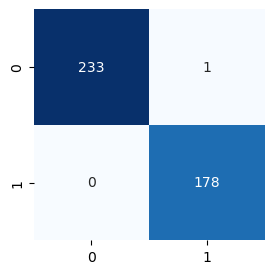

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# conda install seaborn
# !pip install seaborn

mc = confusion_matrix(y_test, y_pred)
print(mc)

vp = 233
vn = 178
fp = 1
fn = 0
exact = (vp+vn)/(vp+vn+fp+fn)
print(exact)

plt.figure(figsize=(4,3))
plt.xlabel('Variables predichas')
plt.ylabel("Verdad Terreno")
sns.heatmap(mc, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.show()

### Evaluación del modelo

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       0.99      1.00      1.00       178

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [10]:
!pip install xgboost

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(use_label_encoder=False)

#Entrenamiento
xgb.fit(X_train, y_train)
#Predicción
y_pred = xgb.predict(X_test)
#Validación
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       234
           1       0.99      0.98      0.99       178

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Matriz de confusión:
[[233   1]
 [  3 175]]


### Tarea 4: Bagging & Boosting

In [4]:
import pandas as pd
import numpy as np

#Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
#Crear dataframe en pandas
columnas = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']
df = pd.read_csv(url, names=columnas)
df.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1
291,55.0,0.0,2.0,132.0,342.0,0.0,0.0,166.0,0.0,1.2,1.0,0.0,3.0,0
292,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0,2


### Preparación de los datos
#### 1. Identificar dónde existen los VF
#### 2. Tratar a esos VF (Eliminarlos o Imputarlos)

In [5]:
# Cambiar los VF que están '?' a 'NaN'
df = df.replace("?", np.nan)
df.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1
291,55.0,0.0,2.0,132.0,342.0,0.0,0.0,166.0,0.0,1.2,1.0,0.0,3.0,0
292,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0,2


In [9]:
# Forma rápida de identificar VF
df.count()
#Subarreglo con los VF
#datos_faltantes = df.isnull()  #isnull - notnull
#datos_faltantes.tail(5)

# for caract in datos_faltantes.columns.values.tolist():
#     print("Característica: ")
#     print(datos_faltantes[caract].value_counts())
#     print("")


age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          299
thal        301
class       303
dtype: int64

### Tratar los VF
#### Eliminar los VF
        1. Si el registro(fila) no tiene la clase que trato de predecir
        2. Cuando no tengo registros suficientes en la característica(columna)
#### Imputar los VF
        1. (Numérico) Media
        2. (Categórico) (bueno - malo - excelente) Frecuencia
                        

In [13]:
# Comprobar valores de ca
print("VALORES DISCRETOS: ") #Categórico
val_ca = df["ca"].unique()
print(val_ca)
print("VALORES CONTINUOS: ") #Numérico
val_age = df["age"].unique()
print(val_age)

val_thal = df["thal"].unique()
print(val_thal)

VALORES DISCRETOS: 
['0.0' '3.0' '2.0' '1.0' nan]
VALORES CONTINUOS: 
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
['6.0' '3.0' '7.0' nan]


### Imputación de los datos

In [14]:
#tipos de datos
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object

In [17]:
#Numérico
med_ca = df["ca"].astype("float").mean()
print(f"media de ca: {med_ca:.2f}")
#imputar la media
df["ca"] = df["ca"].replace(np.nan,  med_ca)
#Comprobar faltantes
df["ca"].count()

media de ca: 0.67


303

In [21]:
#Categórico
mas_freq = df["thal"].value_counts().idxmax()
print(f"La variable más frecuente para thal es: {mas_freq}")
#Imputar la variable
df["thal"] = df["thal"].replace(np.nan, mas_freq) #opción 1
df["thal"].replace(np.nan, mas_freq,inplace=True) #opción 2
#Comprobar faltantes 
df["thal"].count()

La variable más frecuente para thal es: 3.0


303